## Stock Prices prediction using Recurrent Neural Networks

Takes stock price values of 60 days as input to predict its value on the 61st day.

A vector containing 60 stock price values is given as input to a LSTM network. Optimized and checked that 60 sequential values best predicted the output. 

Predicted future opening and closing prices with 11% rms error. (beolw program performs prediction for closing price )

Plotted and observed that the predicted stock prices closely follow th actual proces.






In [0]:
#import packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM


#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('Stocks.csv')

#print the head


In [0]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,9/28/2018,707.0,707.95,681.0,682.65,683.10,131700,910.52
1,9/27/2018,716.8,723.50,691.1,697.80,697.15,156222,1104.25
2,9/26/2018,720.0,724.40,709.0,710.00,711.60,71780,513.48
3,9/25/2018,725.0,725.00,710.5,715.00,718.15,93181,668.03
4,9/24/2018,725.3,728.00,712.0,721.00,721.90,126374,911.15


In [0]:
#sorting by date
df['Date'] = pd.to_datetime(df.Date)
df.index = df['Date']

data= df.sort_index(ascending= True, axis=0)

new_data= data[['Date','Close']]

new_data.index= range(0,len(new_data))

new_data.head()


,Date,Close
0,2017-02-03,1069.20
1,2017-02-06,1029.20
2,2017-02-07,1006.80
3,2017-02-08,1022.60
4,2017-02-09,1010.05


In [0]:
# Preparing train and test sets
train=new_data[:300]
valid= new_data[300:]

In [0]:
#only consdering the 'close' values for training and testing

dataset= new_data['Close']
#converting dataset into x_train and y_train
dataset= dataset.values.reshape(-1,1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [0]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping x_train because LSTM accepts 3D input 

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


In [0]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

#fititng the LSTM network

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=30, batch_size=1, verbose=2)

Epoch 1/30
 - 16s - loss: 0.0132
Epoch 2/30
 - 14s - loss: 0.0049
Epoch 3/30
 - 14s - loss: 0.0039
Epoch 4/30
 - 14s - loss: 0.0032
Epoch 5/30
 - 14s - loss: 0.0028
Epoch 6/30
 - 14s - loss: 0.0029
Epoch 7/30
 - 14s - loss: 0.0022
Epoch 8/30
 - 14s - loss: 0.0025
Epoch 9/30
 - 14s - loss: 0.0019
Epoch 10/30
 - 14s - loss: 0.0017
Epoch 11/30
 - 14s - loss: 0.0014
Epoch 12/30
 - 14s - loss: 0.0013
Epoch 13/30
 - 14s - loss: 0.0015
Epoch 14/30
 - 14s - loss: 0.0014
Epoch 15/30
 - 14s - loss: 0.0011
Epoch 16/30
 - 14s - loss: 0.0012
Epoch 17/30
 - 14s - loss: 0.0012
Epoch 18/30
 - 13s - loss: 0.0013
Epoch 19/30
 - 14s - loss: 0.0012
Epoch 20/30
 - 14s - loss: 0.0012
Epoch 21/30
 - 14s - loss: 0.0013
Epoch 22/30
 - 14s - loss: 0.0015
Epoch 23/30
 - 14s - loss: 0.0012
Epoch 24/30
 - 14s - loss: 0.0011
Epoch 25/30
 - 14s - loss: 0.0012
Epoch 26/30
 - 14s - loss: 0.0014
Epoch 27/30
 - 14s - loss: 0.0011
Epoch 28/30
 - 14s - loss: 0.0013
Epoch 29/30
 - 13s - loss: 0.0011
Epoch 30/30
 - 14s - lo

In [0]:
#predicting test data values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:]['Close']
inputs = inputs.values.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [0]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [0]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [0]:
#calculate rmse (root mean square error)
 closing_price = np.reshape(closing_price, (np.product(closing_price.shape),))
rms=np.sqrt(((valid['Close']- closing_price) ** 2).mean())
rms

11.36621010110603

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


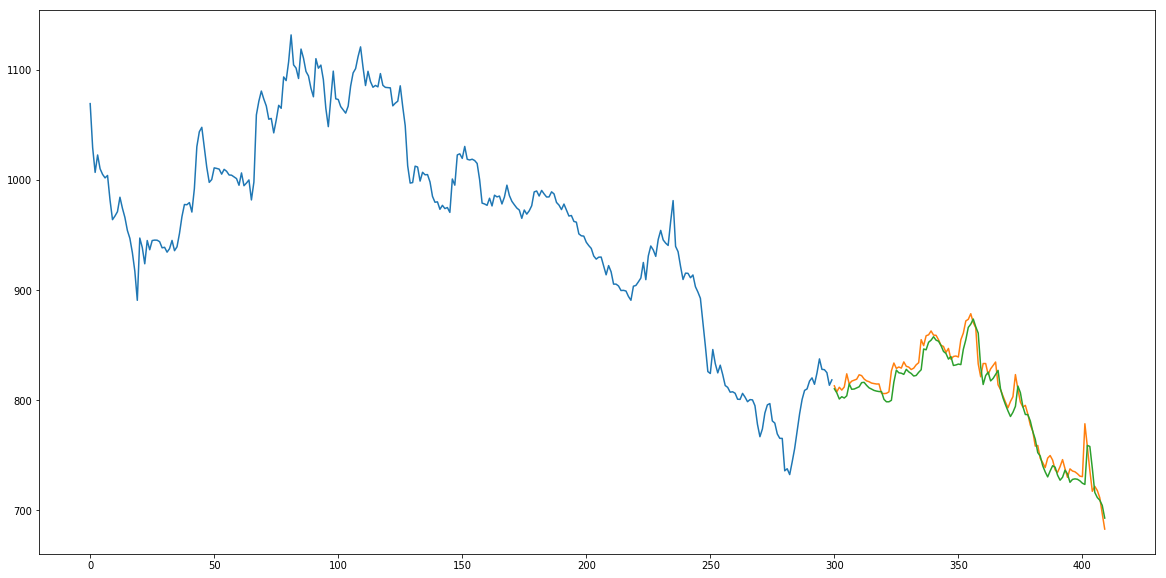

In [0]:
#for plotting
train = new_data[:300]
valid = new_data[300:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])


Result- It can be observed that the predicted stock prices closely follow the actual prices